In [1]:
# Run this code cell for initial setup
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# load the data to colab
data = pd.read_csv('heart.csv')
data.head(100)


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233.0,1,0,150.0,0.0,2.3,0,0,1,1
1,37,1,2,130,250.0,0,1,187.0,0.0,3.5,0,0,2,1
2,41,0,1,130,204.0,0,0,172.0,0.0,1.4,2,0,2,1
3,56,1,1,120,236.0,0,1,178.0,0.0,0.8,2,0,2,1
4,57,0,0,120,354.0,0,1,163.0,1.0,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,53,1,0,142,226.0,0,0,111.0,1.0,0.0,2,0,3,1
96,62,0,0,140,394.0,0,0,157.0,0.0,1.2,1,0,2,1
97,52,1,0,108,233.0,1,1,147.0,0.0,0.1,2,3,3,1
98,43,1,2,130,315.0,0,1,162.0,0.0,1.9,2,1,2,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       324 non-null    int64  
 1   sex       324 non-null    int64  
 2   cp        324 non-null    int64  
 3   trtbps    324 non-null    int64  
 4   chol      321 non-null    float64
 5   fbs       324 non-null    int64  
 6   restecg   324 non-null    int64  
 7   thalachh  320 non-null    float64
 8   exng      321 non-null    float64
 9   oldpeak   324 non-null    float64
 10  slp       324 non-null    int64  
 11  caa       324 non-null    int64  
 12  thall     324 non-null    int64  
 13  output    324 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 35.6 KB


In [4]:
# write your code here
data.duplicated().sum()

np.int64(22)

In [5]:
data.isnull().sum()
data['chol'].fillna(data['chol'].mean(),inplace=True)
data['thalachh'].fillna(data['thalachh'].mean(),inplace=True)
data['exng'].fillna(data['exng'].mode()[0],inplace=True)

In [6]:
data.isnull().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


In [7]:
# write your code here
data[['age','trtbps','chol','thalachh']].describe().drop(['count','min','max'])


,age,trtbps,chol,thalachh
mean,54.518519,131.950617,244.598131,149.081250
std,8.986210,17.498802,50.827614,22.678797
25%,48.000000,120.000000,209.750000,133.750000
50%,56.000000,130.000000,239.500000,152.000000
75%,61.000000,140.000000,273.250000,165.000000


In [8]:
# write your code here
data.groupby('sex')['output'].value_counts()

sex  output
0    1          72
     0          29
1    0         130
     1          93
Name: count, dtype: int64

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

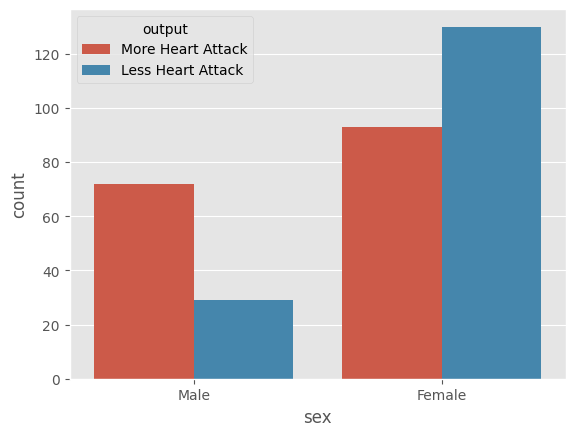

In [9]:
data['output'] = data['output'].map({0: 'Less Heart Attack', 1: 'More Heart Attack'})
ax = sns.countplot(x='sex',hue='output',data=data)
ax.set_xticklabels(['Male','Female'])

[Text(0, 0, 'Typical Angina'),
 Text(1, 0, 'Atypical Angina'),
 Text(2, 0, 'Non-anginal Pain'),
 Text(3, 0, 'Asymptomatic')]

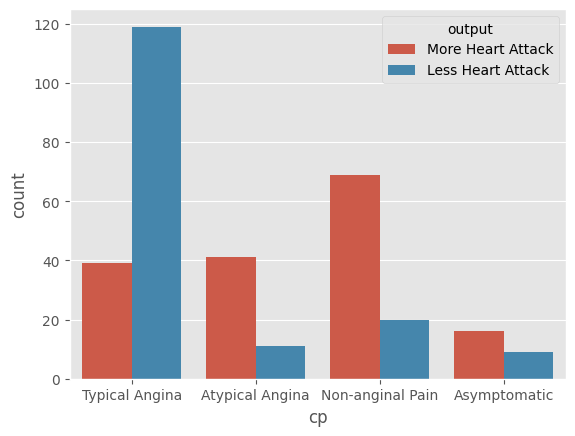

In [10]:

chest_pain=sns.countplot(x='cp',data=data,hue='output')
chest_pain.set_xticklabels(['Typical Angina','Atypical Angina','Non-anginal Pain','Asymptomatic'])

In [11]:
# write your code here
data.groupby('cp')['output'].value_counts()

cp  output           
0   Less Heart Attack    119
    More Heart Attack     39
1   More Heart Attack     41
    Less Heart Attack     11
2   More Heart Attack     69
    Less Heart Attack     20
3   More Heart Attack     16
    Less Heart Attack      9
Name: count, dtype: int64

In [12]:
# write your code here
data['age'].value_counts()

,count
age,
57,22
58,21
59,17
54,16
52,13
44,12
51,12
56,11
63,11


<Axes: xlabel='age', ylabel='Count'>

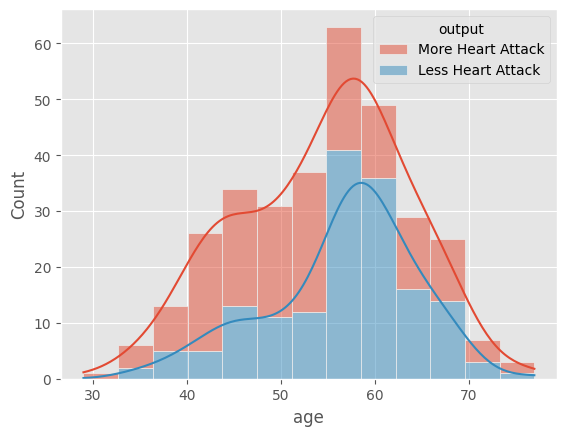

In [13]:
sns.histplot(data=data, x='age', hue='output', kde=True, multiple='stack')


<Axes: xlabel='output', ylabel='age'>

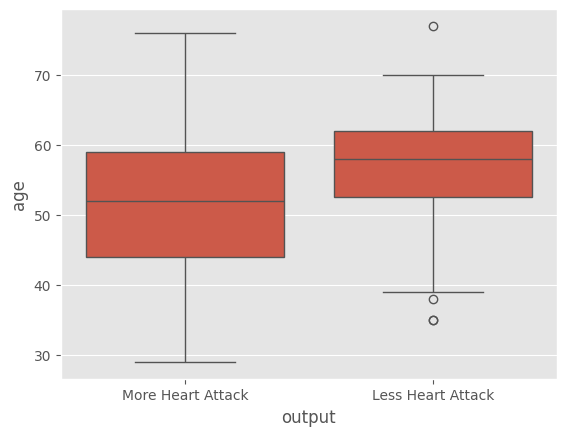

In [14]:
sns.boxplot(x='output', y='age', data=data)

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

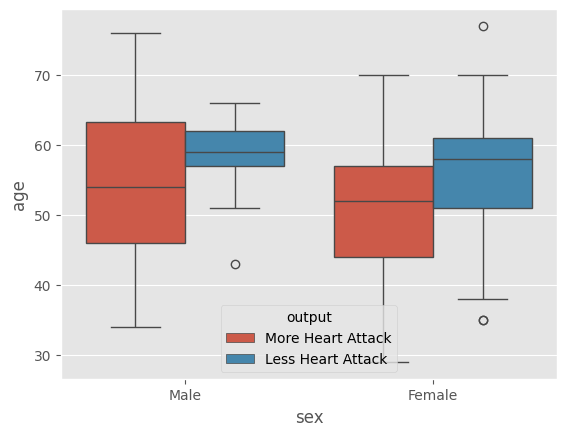

In [15]:
a=sns.boxplot(x='sex', y='age', hue='output', data=data)
a.set_xticklabels(['Male','Female'])

In [16]:
# write your code here
data.groupby('fbs')['output'].value_counts()

fbs  output           
0    More Heart Attack    142
     Less Heart Attack    133
1    Less Heart Attack     26
     More Heart Attack     23
Name: count, dtype: int64

[Text(0, 0, 'Low'), Text(1, 0, 'High')]

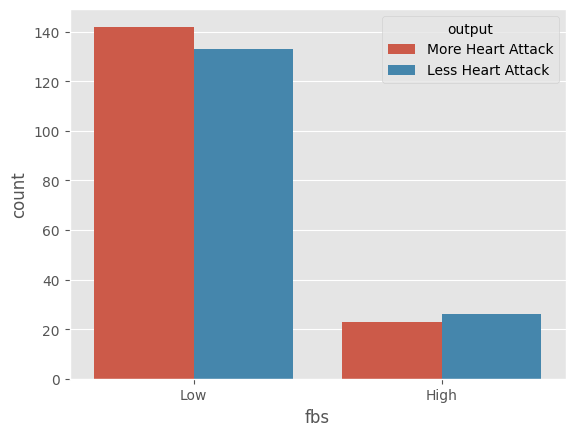

In [17]:
a=sns.countplot(x='fbs', hue='output', data=data)
data.groupby('fbs')['output'].value_counts(normalize=True)
a.set_xticklabels(['Low','High'])

restecg  output           
0        Less Heart Attack    0.558442
         More Heart Attack    0.441558
1        More Heart Attack    0.585366
         Less Heart Attack    0.414634
2        Less Heart Attack    0.833333
         More Heart Attack    0.166667
Name: proportion, dtype: float64

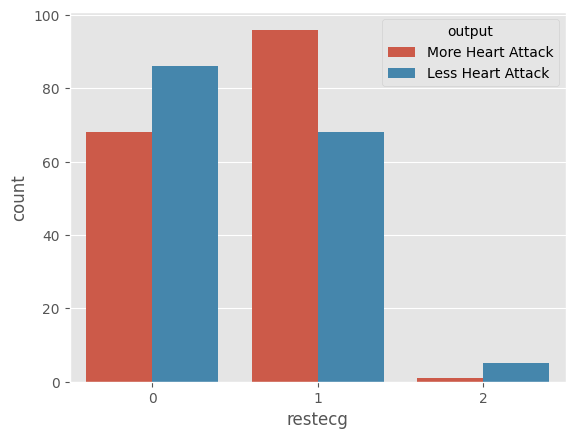

In [18]:
# write your code here
a=sns.countplot(x='restecg', hue='output', data=data)
data.groupby('restecg')['output'].value_counts(normalize=True)


<Axes: xlabel='output', ylabel='trtbps'>

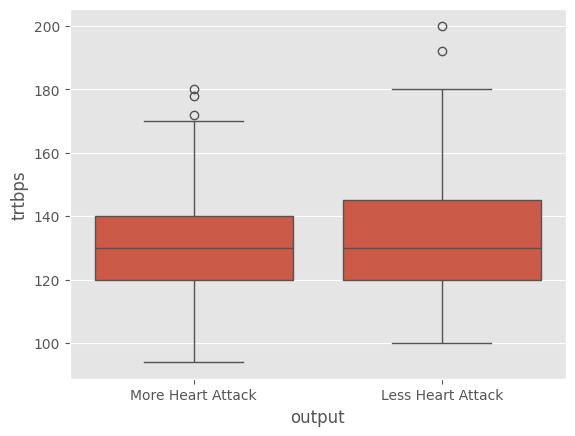

In [19]:
# write your code here
sns.boxplot(x='output', y='trtbps', data=data)

<Axes: xlabel='output', ylabel='thalachh'>

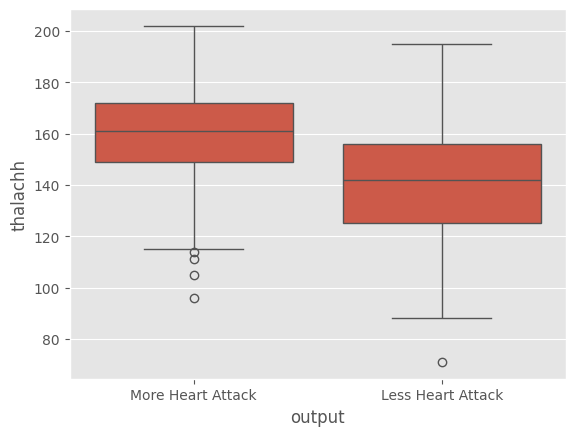

In [20]:
# write your code here
data.groupby('output')['thalachh'].mean()
sns.boxplot(x='output', y='thalachh', data=data)

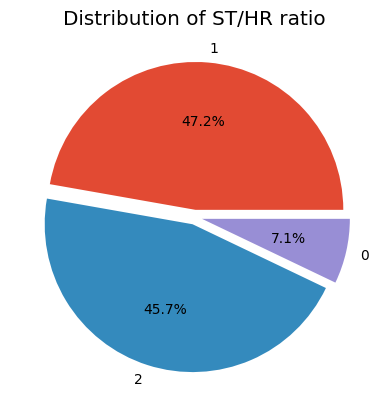

In [21]:
import matplotlib.pyplot as plt

# Count frequencies of sleep values
slp_counts = data['slp'].value_counts()

# Create pie chart
plt.pie(
    slp_counts,
    labels=slp_counts.index,   # unique sleep values
    autopct='%1.1f%%',
    explode=[0.05]*len(slp_counts)  # small separation for all slices
)

plt.title("Distribution of ST/HR ratio")
plt.show()
